<a href="https://colab.research.google.com/github/scooobertdooobert/CS595A/blob/main/carbo_exam1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary: 
### The followinig code demonstrates the use of the given python libraries to import a set a data, preprocess it, and utilize it for the training and testing of two different classification models. The two classification models used were the logistic regression models and K-nearest neighbors. The performance evaluation of each of the models was then calcualted and displayed.The performance metrics for the KNN model including the, precision, recall, and f1 score were 0.97, 0.70, and 0.81, respectively. The precision, recall, and f1 score for the logistic regression model were 0.97, 0.70, and 0.81, respectively. 

### Importing all the python and scikit libraries

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

### Importing the dataset

Printing the head of the dataset

In [3]:
breast_cancer  = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df["target"] = breast_cancer.target
print("First five rows of the data set: ")
df.head()

First five rows of the data set: 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Getting the shape of the dataset

In [4]:
print("Dataframe Shape: ")
df.shape

Dataframe Shape: 


(569, 31)

Getting the Min, max, and avg values of the dataset

In [5]:
print("Min, Max, and Average Values of dataset: ")
df.describe()

Min, Max, and Average Values of dataset: 


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Identifying the Correlation

### Features strongly correlated with the target (in order):


*   Worst Concave Points: -0.773566
*   Worst Perimeter: -0.782914
*   Mean Concave Points: -0.776614


### Features least correlated with the target:


*   Smoothness Error: 0.067016





In [18]:
corr_matrix = df.corr()
corr_matrix["target"].sort_values(ascending=False)

target                     1.000000
smoothness error           0.067016
mean fractal dimension     0.012838
texture error              0.008303
symmetry error             0.006522
fractal dimension error   -0.077972
concavity error           -0.253730
compactness error         -0.292999
worst fractal dimension   -0.323872
mean symmetry             -0.330499
mean smoothness           -0.358560
concave points error      -0.408042
mean texture              -0.415185
worst symmetry            -0.416294
worst smoothness          -0.421465
worst texture             -0.456903
area error                -0.548236
perimeter error           -0.556141
radius error              -0.567134
worst compactness         -0.590998
mean compactness          -0.596534
worst concavity           -0.659610
mean concavity            -0.696360
mean area                 -0.708984
mean radius               -0.730029
worst area                -0.733825
mean perimeter            -0.742636
worst radius              -0

### Features strongly correlated with the worst concave point (in order):


*   Target: -0.793566
*   Texture Error: -0.119638
*   Smoothness Error: -0.102007


### Features least correlated with the target:


*   Mean Concave Points: 0.910155



In [20]:
corr_matrix["worst concave points"].sort_values(ascending=False)

worst concave points       1.000000
mean concave points        0.910155
mean concavity             0.861323
worst concavity            0.855434
worst perimeter            0.816322
mean compactness           0.815573
worst compactness          0.801080
worst radius               0.787424
mean perimeter             0.771241
worst area                 0.747419
mean radius                0.744214
mean area                  0.722017
concave points error       0.602450
perimeter error            0.554897
worst smoothness           0.547691
area error                 0.538166
radius error               0.531062
worst fractal dimension    0.511114
mean smoothness            0.503053
worst symmetry             0.502528
compactness error          0.483208
concavity error            0.440472
mean symmetry              0.430297
worst texture              0.359755
mean texture               0.295316
fractal dimension error    0.215204
mean fractal dimension     0.175325
symmetry error            -0

### Printing Scatter Matrix of the Dataset

Scatter Matrix: 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0c95353d0>,
      dtype=object)

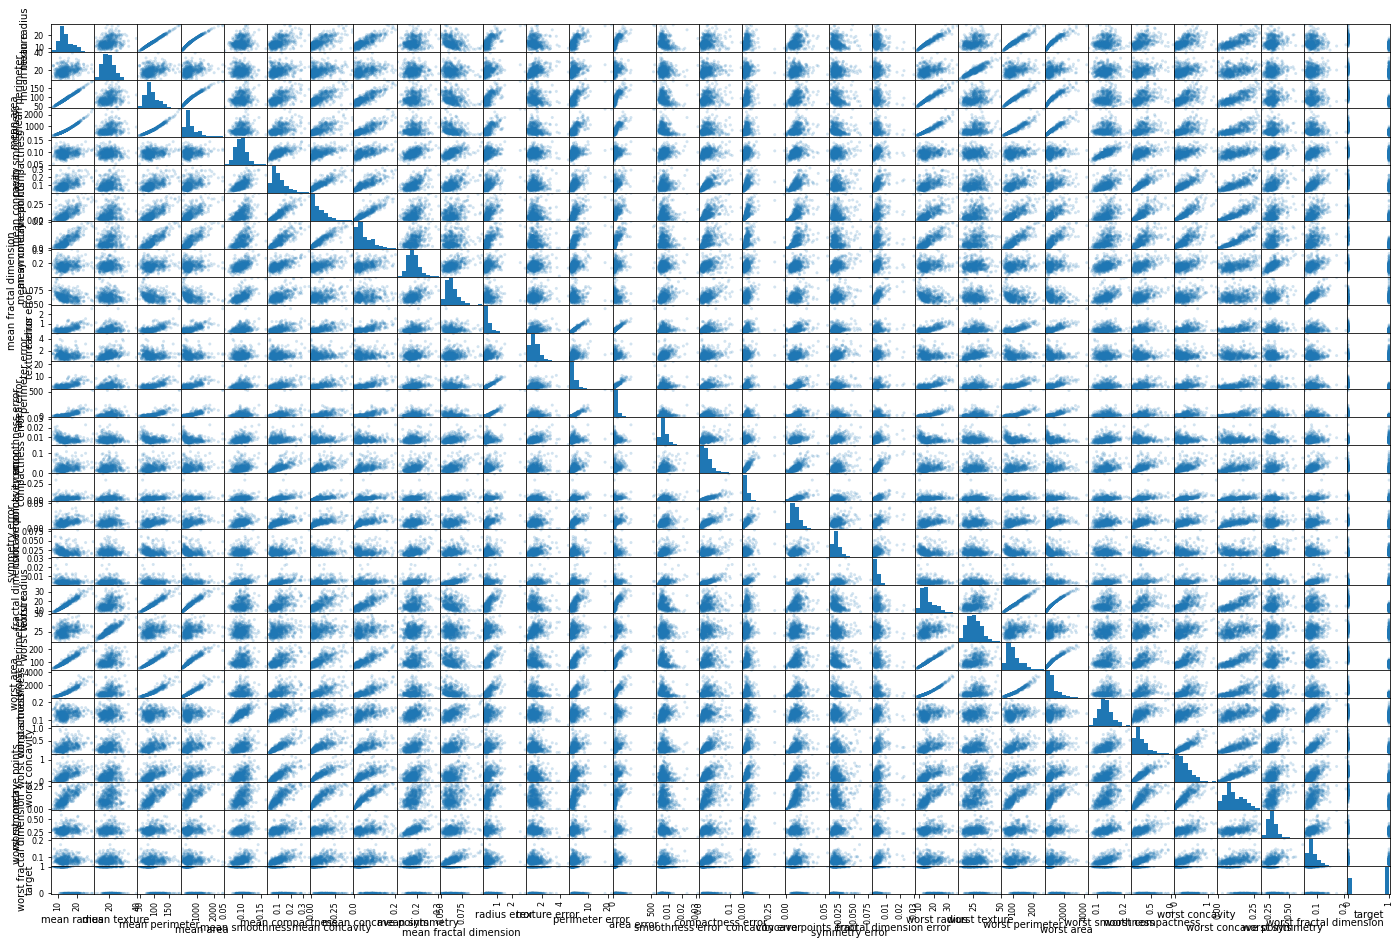

In [6]:
print("Scatter Matrix: ")
pd.plotting.scatter_matrix(df, figsize=(24, 16), alpha = 0.2)

### Creating training set and test set

In [11]:
np.random.seed(42)
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 42)

### Preproccessing Data

In [12]:
incom_rows = df.isnull().any(axis=1).head()
incom_rows.dropna()
cancer_tr = train_set.drop("target", axis=1)
cancer_labels = train_set["target"].copy()
cancer_labels.head()

68     1
181    0
63     1
248    1
60     1
Name: target, dtype: int64

In [13]:
cancer_test = test_set.drop("target", axis=1)
cancer_labels_test = test_set["target"].copy()
cancer_labels_test.head()

204    1
70     0
131    0
431    1
540    1
Name: target, dtype: int64

In [25]:
scaler = StandardScaler()
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.fit_transform(test_set)

### KNN Model and Performance Metrics (Precision, Recall, and F1 Score)

KNN confusion matrix: 


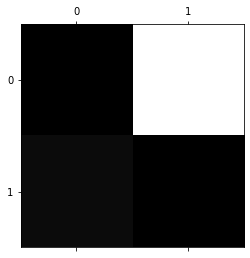

KNN performance: 
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       169
           1       0.85      0.99      0.91       286

    accuracy                           0.88       455
   macro avg       0.91      0.84      0.86       455
weighted avg       0.89      0.88      0.87       455



In [32]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_set, cancer_labels)

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(train_set_scaled, cancer_labels)
y_train_pred = cross_val_predict(sgd_clf, train_set, cancer_labels, cv=3)

print("KNN confusion matrix: ")
conf_mx = confusion_matrix(cancer_labels, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

print("KNN performance: ")
print(classification_report(cancer_labels, y_train_pred))

### Logisitc Regression Model and Performance Metrics (Recall, Precision, F1 Score)

Logistic regression confusion matrix: 


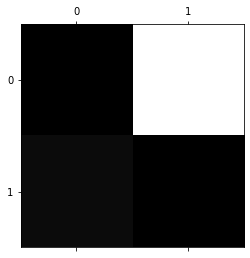

Logistic regression performance: 
              precision    recall  f1-score   support

           0       0.97      0.70      0.81       169
           1       0.85      0.99      0.91       286

    accuracy                           0.88       455
   macro avg       0.91      0.84      0.86       455
weighted avg       0.89      0.88      0.87       455



In [31]:
log_reg_model = LogisticRegression(solver="lbfgs", multi_class="multinomial", C=10)
log_reg_model.fit(train_set_scaled, cancer_labels)

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(train_set_scaled, cancer_labels)
y_train_pred = cross_val_predict(sgd_clf, train_set, cancer_labels, cv=3)

print("Logistic regression confusion matrix: ")
conf_mx = confusion_matrix(cancer_labels, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

print("Logistic regression performance: ")
print(classification_report(cancer_labels, y_train_pred))